# YOLOV5 Object / Drowsiness Detection

In [1]:
import os
import uuid
import time

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import torch
import wandb

/home/satwik/miniconda3/envs/torch-cv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: satwik_9. Use `wandb login --relogin` to force relogin


True

## Loading the Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5m', pretrained=True)

Using cache found in /home/satwik/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-7-13 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 5945MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
Adding AutoShape... 


In [4]:
imgs = ['https://ultralytics.com/images/zidane.jpg']

In [5]:
result = model(imgs)
result.print()

image 1/1: 720x1280 3 persons, 2 ties
Speed: 4212.2ms pre-process, 41.7ms inference, 8.4ms NMS per image at shape (1, 3, 384, 640)


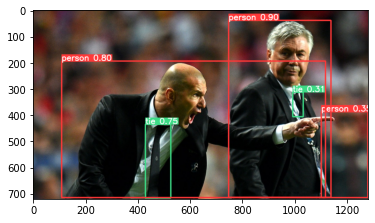

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

### Checking out the `result` class
The result class has a lot of information. Lets check it out

In [7]:
result.xyxy     # [xmin, xmax, ymin, ymax, confidence, class]

[tensor([[7.47655e+02, 3.97249e+01, 1.13873e+03, 7.13561e+02, 8.99684e-01, 0.00000e+00],
         [1.09855e+02, 1.94231e+02, 1.11712e+03, 7.14343e+02, 8.01230e-01, 0.00000e+00],
         [4.29020e+02, 4.35227e+02, 5.26266e+02, 7.16282e+02, 7.47641e-01, 2.70000e+01],
         [1.10139e+03, 3.87671e+02, 1.27942e+03, 7.14242e+02, 3.51524e-01, 0.00000e+00],
         [9.92911e+02, 3.13628e+02, 1.03227e+03, 4.06293e+02, 3.14354e-01, 2.70000e+01]], device='cuda:0')]

In [8]:
img2 = ["data/samples/traffic.jpg"]
result2 = model(img2)

image 1/1: 3456x5184 35 cars, 5 trucks
Speed: 246.1ms pre-process, 49.6ms inference, 2.2ms NMS per image at shape (1, 3, 448, 640)


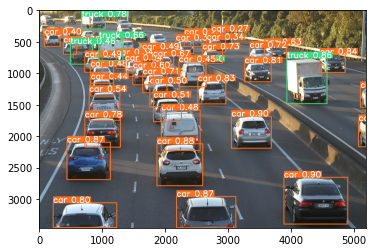

In [9]:
result2.print()
plt.imshow(np.squeeze(result2.render()))
plt.show()

In [10]:
result2.render()[0]

array([[[237, 210, 163],
        [240, 213, 166],
        [244, 217, 170],
        ...,
        [ 70,  72,  35],
        [ 72,  74,  34],
        [ 82,  83,  41]],

       [[241, 213, 165],
        [242, 214, 166],
        [244, 216, 168],
        ...,
        [ 73,  75,  36],
        [ 77,  78,  36],
        [ 88,  87,  43]],

       [[243, 213, 161],
        [243, 213, 161],
        [245, 215, 165],
        ...,
        [ 76,  75,  31],
        [ 79,  78,  30],
        [ 90,  88,  39]],

       ...,

       [[ 58,  61,  76],
        [ 59,  62,  77],
        [ 57,  63,  75],
        ...,
        [ 46,  54,  57],
        [ 46,  54,  57],
        [ 47,  55,  58]],

       [[ 59,  63,  75],
        [ 60,  64,  76],
        [ 57,  63,  75],
        ...,
        [ 47,  55,  58],
        [ 46,  54,  57],
        [ 46,  54,  57]],

       [[ 62,  66,  77],
        [ 63,  67,  78],
        [ 61,  68,  78],
        ...,
        [ 49,  57,  60],
        [ 48,  56,  59],
        [ 46,  54,  57]]

## Setting up the Live Feed !


In [11]:
cv.namedWindow("YOLOv5-Feed", cv.WINDOW_AUTOSIZE)

cam = cv.VideoCapture(0)
while cam.isOpened():
    ret, frame = cam.read()
    res = model(frame)
    cv.imshow("YOLO-Feed", np.squeeze(res.render()))
    if cv.waitKey(10) & 0xFF == ord('q'):
        break
cam.release()
cv.destroyAllWindows()

Qt: Session management error: Could not open network socket
Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix collation implementation
Case insensitive sorting unsupported in the posix collation implementation
Numeric mode unsupported in the posix collation implementation


## Training the Drowsiness Detector

In [12]:
IMG_PATH = os.path.join("data", "images")
labels = ["awake", "down", "happy", "sad", "sleepy"]
num_imgs = 64

In [13]:
# cam = cv.VideoCapture(0)
# for label in labels:
#     print(f"Collecting images for {label} ...")
#     time.sleep(5)

#     for img_num in range(num_imgs):
#         print(f"Collecting images for {label}, Image Number: {img_num}")
#         # reading webcam feed
#         ret, frame = cam.read()
        
#         # setting up image name
#         img_name = os.path.join(IMG_PATH, label+'-'+str(uuid.uuid1())+'.jpg')
        
#         # saving the images
#         cv.imwrite(img_name, frame)
#         cv.imshow("Image Collection Window", frame)
#         time.sleep(2)

#     if cv.waitKey(10) & 0xFF == ord('q'):
#         break

# cam.release()
# cv.destroyAllWindows()

In [14]:
# !bash train.sh

## Checkout the Model

In [15]:
MODELPATH = "yolov5/runs/train/exp/weights/best.pt"
model2 = torch.hub.load('ultralytics/yolov5', 'custom', path=MODELPATH, force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/satwik/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-7-13 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 5945MiB)

Fusing layers... 
Model summary: 290 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [16]:
img_path = "data/images/awake-9b709276-01eb-11ed-9b5e-ffe017f24267.jpg"
res = model([img_path])
res.print()

image 1/1: 480x640 1 person, 1 clock
Speed: 20.9ms pre-process, 51.4ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)


In [18]:
cv.namedWindow("YOLOv5-Drowsy-Feed", cv.WINDOW_AUTOSIZE)

cam = cv.VideoCapture(0)
while cam.isOpened():
    ret, frame = cam.read()
    res = model2(frame)
    cv.imshow("YOLOv5-Drowsy-Feed", np.squeeze(res.render()))
    if cv.waitKey(10) & 0xFF == ord('q'):
        break
cam.release()
cv.destroyAllWindows()